<h1 style="color:red; text-align:center; text-decoration:underline;">Apprentissage par Renforcement : Deep Q-Network (DQN)</h1>


<h2 style="color:green; text-decoration:underline;">Test : Entraînement de l’agent DQN sur l’environnement CartPole-v1</h2>

Dans ce test, un agent est entraîné à résoudre l’environnement dynamique **CartPole-v1** en maintenant une tige en équilibre sur un chariot en mouvement.  
L’algorithme utilisé est le **DQN (Deep Q-Network)**, qui s’appuie sur un réseau de neurones pour approximer la fonction de valeur d’action (Q).  
L’apprentissage repose sur l’interaction avec l’environnement, en combinant exploration (ε-greedy) et exploitation des connaissances apprises.


In [15]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

# 🔧 Paramètres
env = gym.make("CartPole-v1", render_mode="human")
state_dim = env.observation_space.shape[0]
n_actions = env.action_space.n

# 🧠 Réseau de neurones
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 128), nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# 🎯 Choix d’action
def choose_action(state, epsilon, model, action_space):
    if random.random() < epsilon:
        return action_space.sample()
    with torch.no_grad():
        state_tensor = torch.tensor(state, dtype=torch.float32)
        q_values = model(state_tensor)
        return torch.argmax(q_values).item()

# 🔁 Entraînement
def train_step(model, target_model, optimizer, batch, gamma):
    states, actions, rewards, next_states, dones = zip(*batch)
    states = torch.tensor(states, dtype=torch.float32)
    actions = torch.tensor(actions)
    rewards = torch.tensor(rewards)
    next_states = torch.tensor(next_states, dtype=torch.float32)
    dones = torch.tensor(dones, dtype=torch.bool)

    q_values = model(states).gather(1, actions.unsqueeze(1)).squeeze()
    with torch.no_grad():
        next_q_values = target_model(next_states).max(1)[0]
    target = rewards + gamma * next_q_values * (~dones)

    loss = nn.MSELoss()(q_values, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 🚀 Initialisation
model = DQN(state_dim, n_actions)
target_model = DQN(state_dim, n_actions)
target_model.load_state_dict(model.state_dict())

optimizer = optim.Adam(model.parameters(), lr=0.001)
memory = deque(maxlen=10000)
epsilon = 1.0
gamma = 0.99
batch_size = 64
episodes = 100

# 🔁 Boucle d’apprentissage
for ep in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state, epsilon, model, env.action_space)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        memory.append((state, action, reward, next_state, done))
        state = next_state
        total_reward += reward

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            train_step(model, target_model, optimizer, batch, gamma)

    epsilon = max(0.1, epsilon * 0.995)
    if ep % 10 == 0:
        target_model.load_state_dict(model.state_dict())
    print(f"🎮 Épisode {ep}, Récompense: {total_reward:.2f}, ε: {epsilon:.3f}")

env.close()
print("✅ Entraînement terminé.")


🎮 Épisode 0, Récompense: 20.00, ε: 0.995
🎮 Épisode 1, Récompense: 27.00, ε: 0.990
🎮 Épisode 2, Récompense: 18.00, ε: 0.985
🎮 Épisode 3, Récompense: 21.00, ε: 0.980
🎮 Épisode 4, Récompense: 72.00, ε: 0.975
🎮 Épisode 5, Récompense: 17.00, ε: 0.970
🎮 Épisode 6, Récompense: 14.00, ε: 0.966
🎮 Épisode 7, Récompense: 17.00, ε: 0.961
🎮 Épisode 8, Récompense: 12.00, ε: 0.956
🎮 Épisode 9, Récompense: 16.00, ε: 0.951
🎮 Épisode 10, Récompense: 9.00, ε: 0.946
🎮 Épisode 11, Récompense: 16.00, ε: 0.942
🎮 Épisode 12, Récompense: 10.00, ε: 0.937
🎮 Épisode 13, Récompense: 36.00, ε: 0.932
🎮 Épisode 14, Récompense: 21.00, ε: 0.928
🎮 Épisode 15, Récompense: 10.00, ε: 0.923
🎮 Épisode 16, Récompense: 32.00, ε: 0.918
🎮 Épisode 17, Récompense: 18.00, ε: 0.914
🎮 Épisode 18, Récompense: 14.00, ε: 0.909
🎮 Épisode 19, Récompense: 11.00, ε: 0.905
🎮 Épisode 20, Récompense: 32.00, ε: 0.900
🎮 Épisode 21, Récompense: 24.00, ε: 0.896
🎮 Épisode 22, Récompense: 15.00, ε: 0.891
🎮 Épisode 23, Récompense: 15.00, ε: 0.887
🎮 É

<h3 style="color:#0056b3; text-decoration:underline;">Interprétation de la Simulation Visuelle</h3>

L’image générée par **pygame** représente un instant de la simulation CartPole.  
On y observe le chariot se déplaçant horizontalement pour maintenir la tige en position verticale.  
La fluidité du mouvement et la durée pendant laquelle la tige reste en équilibre témoignent visuellement de l’apprentissage réussi de l’agent.  
Ce rendu confirme que le DQN a appris une stratégie efficace : anticiper les déséquilibres en ajustant les déplacements du chariot en temps réel.



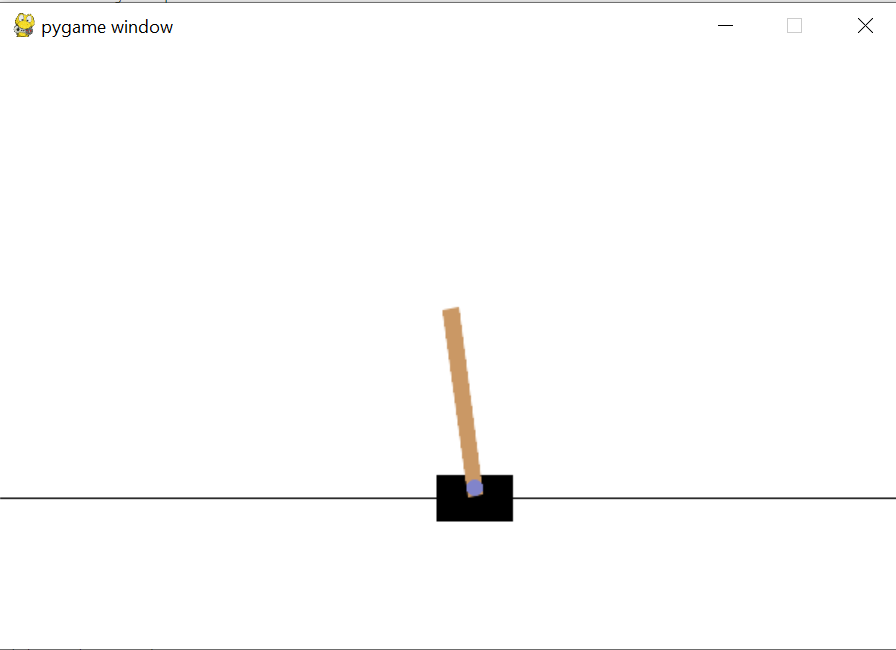




<h3 style="color:#0056b3; text-decoration:underline;">Résultat et Interprétation</h3>

Au fil de l'entraînement, l’agent améliore significativement sa capacité à stabiliser la tige.  
Il commence avec des performances modestes (environ 15 à 25 points de récompense par épisode), puis atteint progressivement des scores supérieurs à 50.  
Cette progression est directement liée à la diminution de l’ε (epsilon), qui oriente l’agent vers une exploitation plus optimale de ses apprentissages.  
L’amélioration continue des scores traduit la montée en compétence de l’agent et la bonne convergence du modèle.
